# Regression Analysis - Real Estate Price Forecasting

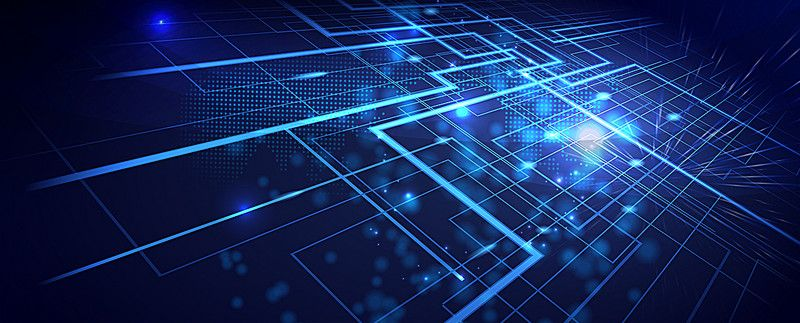

### Gerekli kütüphaneleri yükleme

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

### Veri setini yükleme

In [2]:
df = pd.read_csv("EmlakVeriSeti.csv", sep=";")

### Veri setini görüntüleme

In [3]:
df.head()

,alan,odasayisi,binayasi,fiyat
0,180,5,10,510000
1,225,4,18,508000
2,260,3,2,548000
3,320,6,10,650000
4,335,4,9,628000


### Bağımsız değişkenleri seçme

In [4]:
X = df[['alan', 'odasayisi', 'binayasi']]

### Bağımlı değişkeni seçme

In [5]:
y = df['fiyat']


### Veri setini eğitim ve test setlerine bölme

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### XGBoost Regressor modelini tanımlama ve eğitme

In [7]:
xgb_reg = XGBRegressor()
xgb_reg.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

### Eğitim seti üzerinde tahmin yapma

In [8]:
y_train_pred = xgb_reg.predict(X_train)


### Test seti üzerinde tahmin yapma

In [9]:
y_test_pred = xgb_reg.predict(X_test)


### Gerçek ve tahmin edilen değerleri bir DataFrame'e kaydetme

In [10]:
train_result_df = pd.DataFrame({'Gerçek Değer': y_train.values, 'Tahmini Değer': y_train_pred, 'Veri Seti': 'Eğitim'})
test_result_df = pd.DataFrame({'Gerçek Değer': y_test.values, 'Tahmini Değer': y_test_pred, 'Veri Seti': 'Test'})


### Tüm sonuçları birleştirme

In [11]:
result_df = pd.concat([train_result_df, test_result_df], ignore_index=True)


### DataFrame'i yazdırma

In [12]:
print(result_df.to_string(index=True))


   Gerçek Değer  Tahmini Değer Veri Seti
0        510000    510000.0625    Eğitim
1        725000    724999.8125    Eğitim
2        548000    548000.0625    Eğitim
3        628000    628000.0625    Eğitim
4        650000    649999.9375    Eğitim
5        680000    679999.9375    Eğitim
6        508000    510000.0625      Test
7        632000    628000.3750      Test


### Eğitim seti için gerçek ve tahmin edilen değerlerin scatter plot'u

Text(0, 0.5, 'Tahmini Değer')

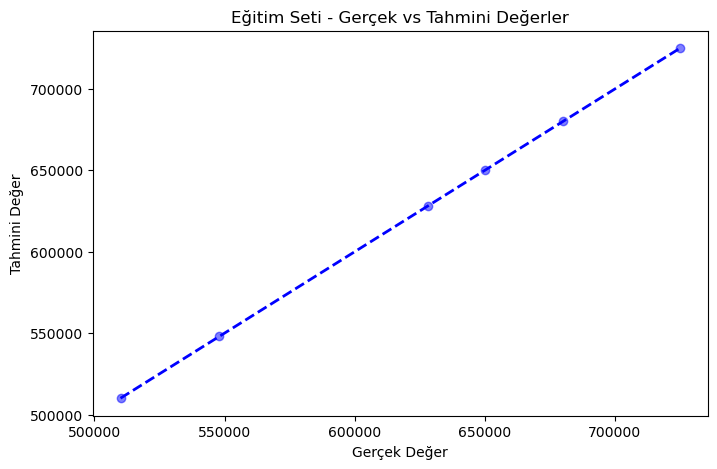

In [13]:
plt.figure(figsize=(27, 11))

plt.subplot(2, 3, 1)
plt.scatter(y_train, y_train_pred, color='blue', alpha=0.5)
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], linestyle='--', color='blue', linewidth=2)
plt.title('Eğitim Seti - Gerçek vs Tahmini Değerler')
plt.xlabel('Gerçek Değer')
plt.ylabel('Tahmini Değer')

### Test seti için gerçek ve tahmin edilen değerlerin scatter plot'u

Text(0, 0.5, 'Tahmini Değer')

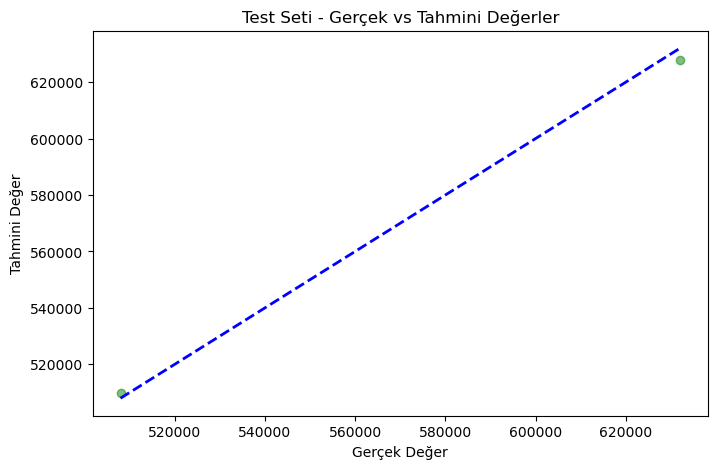

In [14]:
plt.figure(figsize=(27, 11))

plt.subplot(2, 3, 2)
plt.scatter(y_test, y_test_pred, color='green', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='blue', linewidth=2)
plt.title('Test Seti - Gerçek vs Tahmini Değerler')
plt.xlabel('Gerçek Değer')
plt.ylabel('Tahmini Değer')

### Hata ölçümlerini hesaplama

In [15]:
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

### R^2 Skoru

In [16]:
r2_train = xgb_reg.score(X_train, y_train)
r2_test = xgb_reg.score(X_test, y_test)

### Hata ölçümleri ve R^2 skoru yazdırma

In [17]:
print("\nOrtalama Kare Hatası (MSE) - Eğitim:", mse_train)
print("Ortalama Kare Hatası (MSE) - Test:", mse_test)
print("\nR^2 Skoru - Eğitim:", r2_train)
print("R^2 Skoru - Test:", r2_test)


Ortalama Kare Hatası (MSE) - Eğitim: 0.009114583333333334
Ortalama Kare Hatası (MSE) - Test: 9998625.072265625

R^2 Skoru - Eğitim: 0.9999999999983327
R^2 Skoru - Test: 0.9973989008656957


### Eğitim seti için hata dağılımı

Text(0.5, 0, 'Hata')

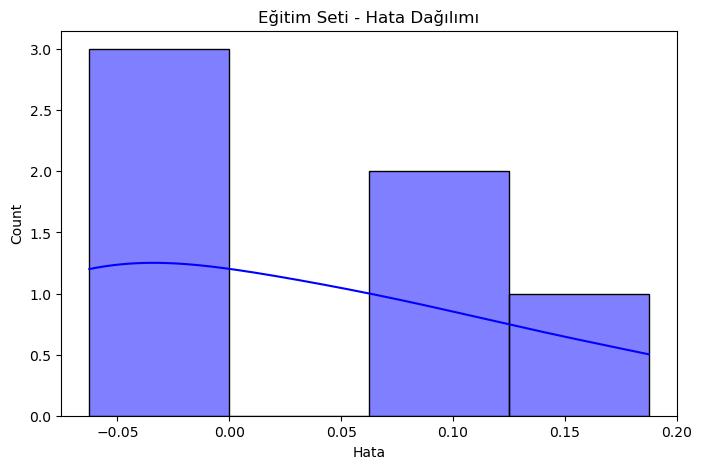

In [18]:
plt.figure(figsize=(27, 11))

plt.subplot(2, 3, 3)
sns.histplot(y_train - y_train_pred, kde=True, color='blue')
plt.title('Eğitim Seti - Hata Dağılımı')
plt.xlabel('Hata')

### Test seti için hata dağılımı

Text(0.5, 0, 'Hata')

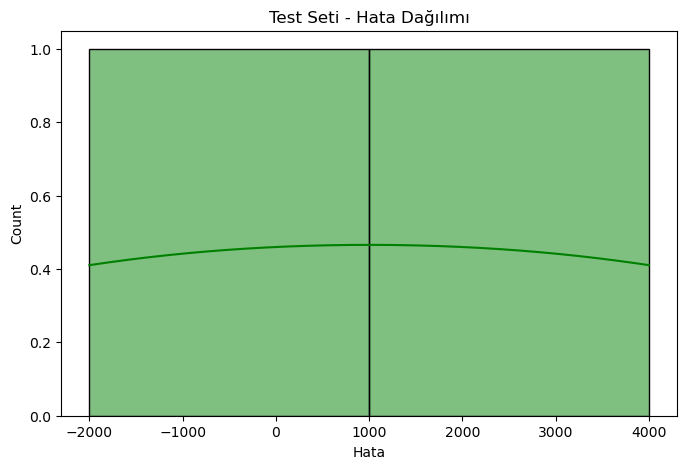

In [19]:
plt.figure(figsize=(27, 11))

plt.subplot(2, 3, 4)
sns.histplot(y_test - y_test_pred, kde=True, color='green')
plt.title('Test Seti - Hata Dağılımı')
plt.xlabel('Hata')

### R^2 skoru görselleştirme

Text(0, 0.5, 'R^2 Skoru')

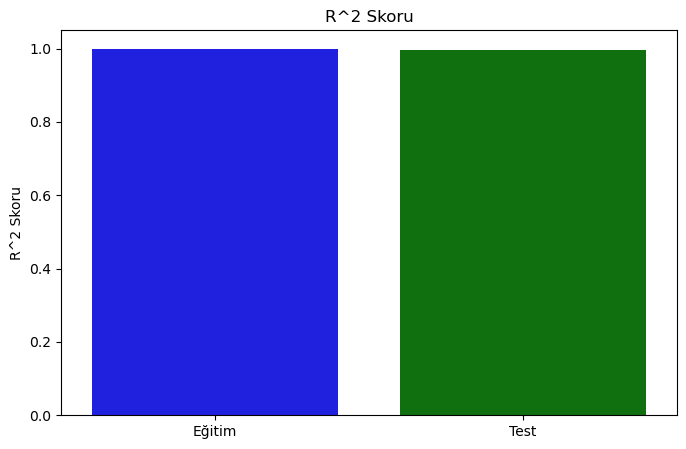

In [20]:
plt.figure(figsize=(27, 11))

plt.subplot(2, 3, 5)
sns.barplot(x=['Eğitim', 'Test'], y=[r2_train, r2_test], palette=['blue', 'green'])
plt.title('R^2 Skoru')
plt.ylabel('R^2 Skoru')

### Ortalama Kare Hatası (MSE) görselleştirme

Text(0, 0.5, 'MSE')

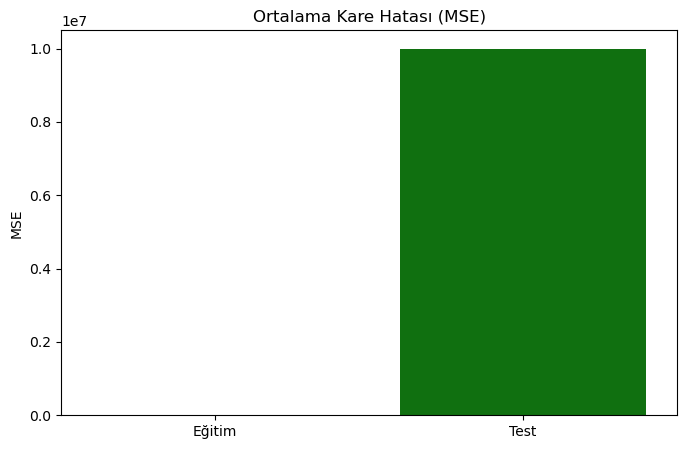

In [21]:
plt.figure(figsize=(27, 11))

plt.subplot(2, 3, 6)
sns.barplot(x=['Eğitim', 'Test'], y=[mse_train, mse_test], palette=['blue', 'green'])
plt.title('Ortalama Kare Hatası (MSE)')
plt.ylabel('MSE')